## Spotify Songs Data Explorations

In [61]:
# Import libraries 

import numpy as np 
import pandas as pd

# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

from scipy import misc
import io

import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import pydotplus



%matplotlib inline

### Load data

   - Download [spotify dataset from Kaggle](https://www.kaggle.com/geomack/spotifyclassification)



In [62]:
data = pd.read_csv('data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [63]:
data.head(3)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future


In [64]:
# split the data into training and validation data

train, test = train_test_split(data, test_size = 0.15)

print("Training Size : {}  Test Size {}".format(len(train), len(test)))

Training Size : 1714  Test Size 303


In [65]:
train.shape

(1714, 17)

In [66]:
data.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [67]:
# create a subset with songs liked by the user where target = 1 or not = 0

pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']

pos_loud = data[data['target'] == 1]['loudness']
neg_loud = data[data['target'] == 0]['loudness']

pos_speech = data[data['target'] == 1]['speechiness']
neg_speech = data[data['target'] == 0]['speechiness']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']


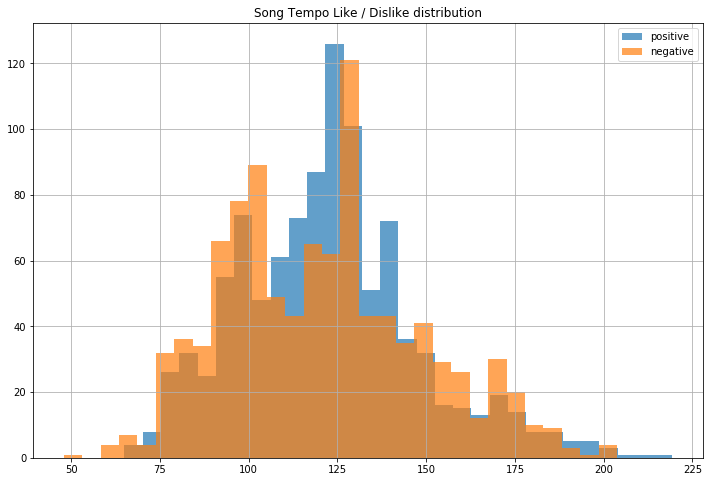

In [68]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo Like / Dislike distribution')
pos_tempo.hist(alpha= 0.7, bins=30, label='positive')
neg_tempo.hist(alpha= 0.7, bins=30, label='negative')
plt.legend(loc = "upper right")

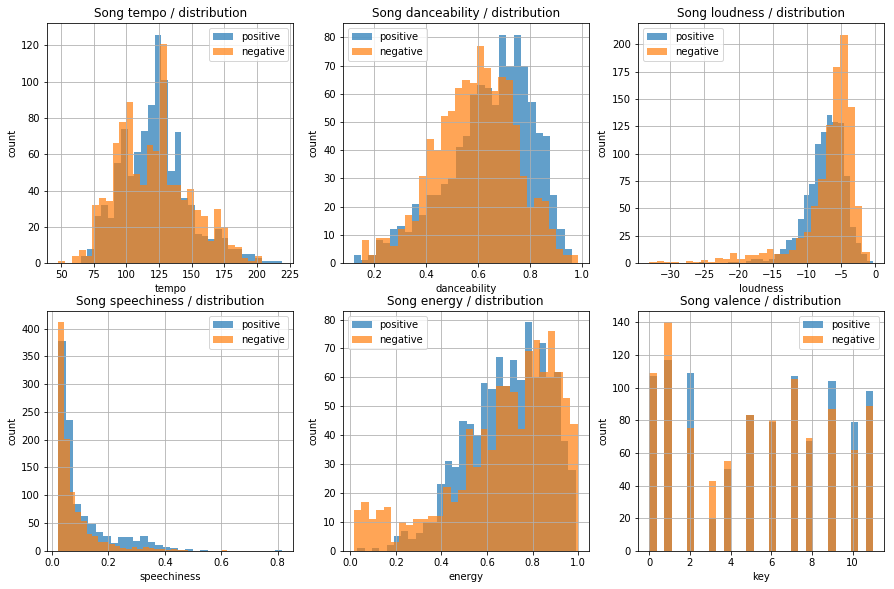

In [69]:
# Plotting with sub plot
fig2 = plt.figure(figsize=(15, 15))

ax = fig2.add_subplot(331)
ax.set_xlabel('tempo')
ax.set_ylabel('count')
ax.set_title('Song tempo / distribution')
pos_tempo.hist(alpha=0.7, bins=30,  label='positive')
neg_tempo.hist(alpha=0.7, bins=30,  label='negative')
plt.legend(loc = "best")

#danceability
ax3 = fig2.add_subplot(332)
ax3.set_xlabel('danceability')
ax3.set_ylabel('count')
ax3.set_title('Song danceability / distribution')
pos_dance.hist(alpha=0.7, bins=30,  label='positive')
neg_dance.hist(alpha=0.7, bins=30,  label='negative')
plt.legend(loc = "best")

# loudness
ax4 = fig2.add_subplot(333)
ax4.set_xlabel('loudness')
ax4.set_ylabel('count')
ax4.set_title('Song loudness / distribution')
pos_loud.hist(alpha=0.7, bins=30,  label='positive')
neg_loud.hist(alpha=0.7, bins=30,  label='negative')
plt.legend(loc = "best")

# speechiness
ax5 = fig2.add_subplot(334)
ax5.set_xlabel('speechiness')
ax5.set_ylabel('count')
ax5.set_title('Song speechiness / distribution')
pos_speech.hist(alpha=0.7, bins=30,  label='positive')
neg_speech.hist(alpha=0.7, bins=30,  label='negative')
plt.legend(loc = "best")

# energy
ax6 = fig2.add_subplot(335)
ax6.set_xlabel('energy')
ax6.set_ylabel('count')
ax6.set_title('Song energy / distribution')
pos_energy.hist(alpha=0.7, bins=30,  label='positive')
neg_energy.hist(alpha=0.7, bins=30,  label='negative')
plt.legend(loc = "best")

# key
ax6 = fig2.add_subplot(336)
ax6.set_xlabel('key')
ax6.set_ylabel('count')
ax6.set_title('Song valence / distribution')
pos_key.hist(alpha=0.7, bins=30,  label='positive')
neg_key.hist(alpha=0.7, bins=30,  label='negative')
plt.legend(loc = "best")

## Decision Tree Classifiers

In [70]:
c = DecisionTreeClassifier(min_samples_split=100)

In [71]:
features = ['danceability','energy','loudness','speechiness', 'tempo', 'valence']

X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [72]:
dt = c.fit(X_train, y_train)

In [78]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, features_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [79]:
show_tree(dt, features, 'data/dt_tree1.png')

TypeError: export_graphviz() got an unexpected keyword argument 'features_names'

In [76]:
# def show_tree(tree, features, path):
#     f = io.StringIO()
#     export_graphviz(tree, out_file = f, feature_names=features)
#     pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
#     img = misc.imread(path)
#     plt.rcParams['figure.figsize'] = (20, 20)
#     plt.imshow(img)


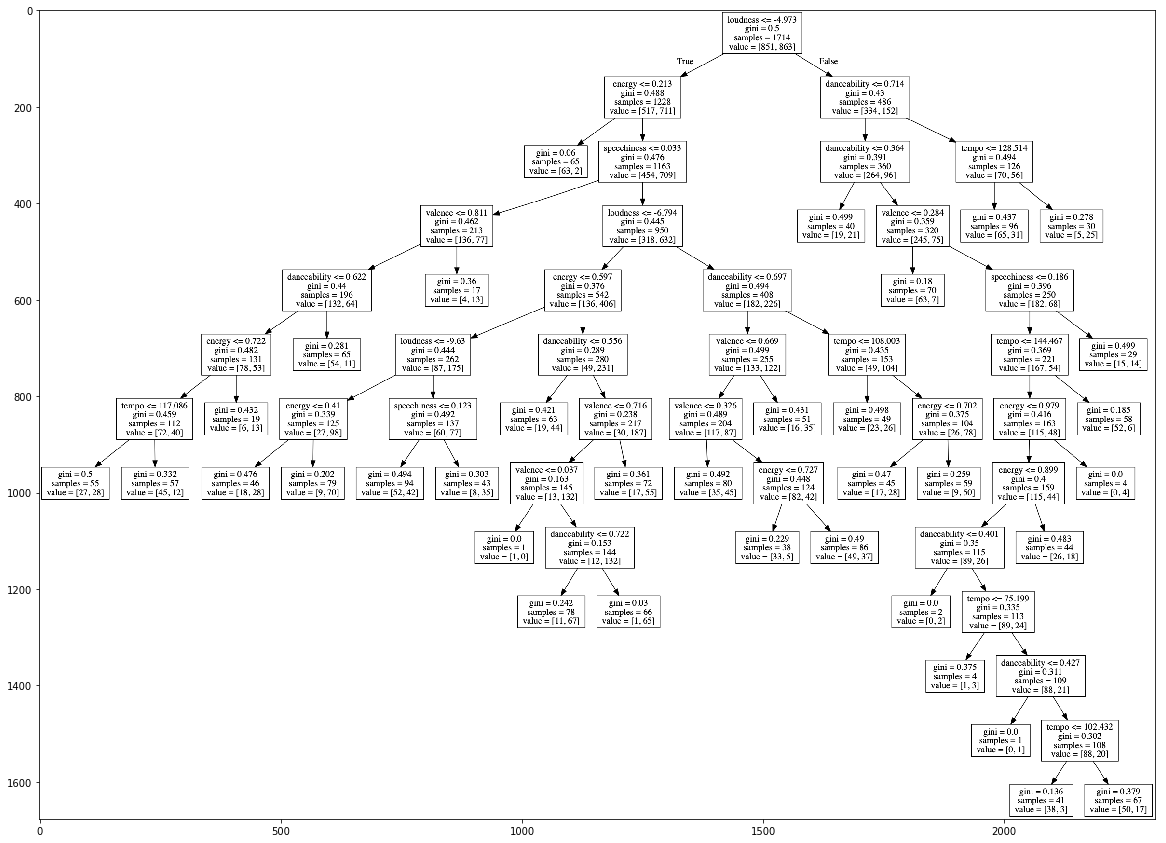